In [1]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
from pytesseract import Output
from utils import convert_key_value_pairs
pytesseract.pytesseract.tesseract_cmd = r'E:\Downloads\Tesseract OCR\tesseract.exe'

Loading from E:\Nitin\RVCE\Projects\PDF-OCR\code\models
Entities []


# Helper functions

In [32]:
def sharpen_image(img):
    # Input:
        # img - image for sharpening
    #kernel for sharpening image
    kernel = np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])

    #Sharpen the image for better text recognition
    sharpened = cv2.filter2D(img, -1, kernel)
    return sharpened

def plot_image(img):
    # @input:
        #img - sharpened image
    #Extract text from image
    text = pytesseract.image_to_string(img)
    plt.imshow(img)
    #Set title of the image as the extracted text
    plt.title(text)
    plt.show()

def get_coordinates_from_xlsx(path):
    # @input
    #  - path = The path to the excel file (template)

    # @ Output
    #   Dictionary containing co-ordinates of the form
    #   {
    #           "Label Name":
    #           {
    #             "top_left":(x1,y1),
    #             "bottom_right":(x2,y2)
    #           }
    #   }

    import pandas as pd
    #df = pd.read_excel('./Sample images/Data-1132.xlsx')
    df = pd.read_excel(path)
    
    #Extract width height and top left x,y co-ordinates
    w     = df.iloc[:,0]
    h     = df.iloc[:,1]
    x1    = df.iloc[:,2]
    y1    = df.iloc[:,3]
    #Extract labels as a list
    label = list(df.iloc[:,4])

    # Add width and height to x1 and y1 respectively to get the bottom right co-ordinates
    x2 = x1+w
    y2 = y1+h

    coordinates = {}
    for i in range(len(label)):    
        coordinates[label[i]] = {"top_left":(x1[i],y1[i]),"bottom_right":(x2[i],y2[i])}
    coordinates

    return coordinates

def predict_image(path,excel_path):
    # @Input
    #   path = The path to the image associated to the template file (Excel)

    # @Output
    #   Image marked with the rectangles around entities and outputs of each entity

    import cv2 as cv
    import numpy as np
    from matplotlib import pyplot as plt

    img = cv.imread(path,0)
    coordinates = get_coordinates_from_xlsx(excel_path)

    for k in coordinates.keys():
        x1,y1 = coordinates[k].get('top_left')
        x2,y2 = coordinates[k].get('bottom_right')
        cv.rectangle(
                    img,
                    (x1,y1),
                    (x2,y2),
                    (0,0,255),
                    1
            )
        
        sub_image = img[y1:y2,x1:x2]        
        # Sharpen the image for better text recognition
        sharpened = sharpen_image(sub_image)
        print(k)
        plot_image(sharpened)
    
    

# Template test

Company Name


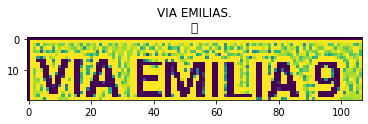

Company Address


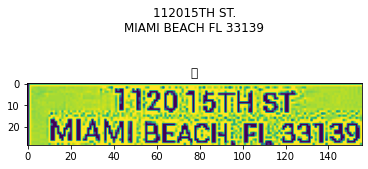

Invoice Number


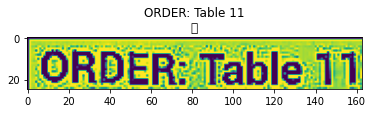

Tax


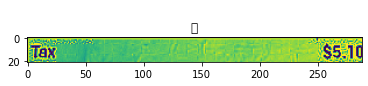

Total


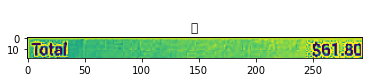

In [33]:
predict_image(
    './Sample images/1132-receipt.jpg',
    './Sample images/Data-1132.xlsx'
    )